In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from polling_simulator import Demographic, Variable, generate_electorate, run_elections, run_polls
from polling_simulator.aggregation import naive_aggregation
from polling_simulator.sampling import predefined_sample

sns_palette = sns.color_palette()[::3] # makes first color blue, second color red
sns.set_palette(sns_palette)

Let's set up a dummy electorate, with a single demographic that includes everyone, and has 1 million eligible voters and a very narrow preference for the Democrat:

In [2]:

everyone = Variable("everyone", lambda x: np.ones(x).astype(bool))

demographics = [
    Demographic(
        turnout_likelihood=0.7,
        response_likelihood=1.0,
        candidate_preference={"Democrat": 0.502, "Republican": 0.498},
        population_segmentation = (everyone == True)
    )
]
np.random.seed(123)
electorate = generate_electorate(1000000, demographics)

In [3]:
simulated_elections = run_elections(500, electorate)
simulated_elections["total_votes"] = simulated_elections.sum(axis=1)
simulated_elections["Democrat"] = simulated_elections["Democrat"] / simulated_elections["total_votes"]
simulated_elections["Republican"] = simulated_elections["Republican"] / simulated_elections["total_votes"]

(0.0, 1.0)

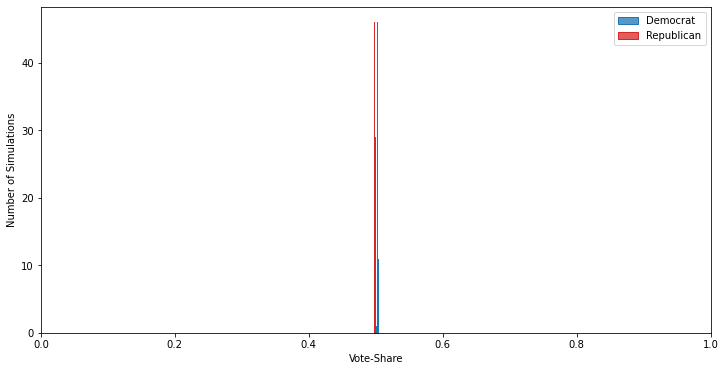

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    simulated_elections[["Democrat", "Republican"]], element="step", bins=100, ax=ax, alpha=0.75
)
ax.set_xlabel("Vote-Share")
ax.set_ylabel("Number of Simulations")
ax.set_xlim([0, 1])

Text(0, 0.5, 'Number of Simulations')

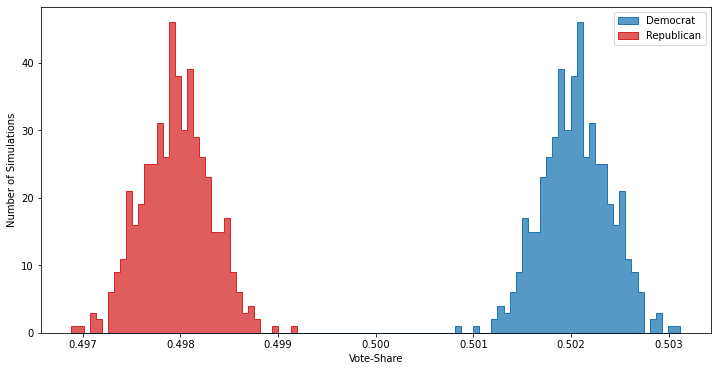

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    simulated_elections[["Democrat", "Republican"]], element="step", bins=100, ax=ax, alpha=0.75
)
ax.set_xlabel("Vote-Share")
ax.set_ylabel("Number of Simulations")

In [6]:
np.random.seed(100)
single_poll_results = run_polls(
    num_polls=1,
    num_to_poll=1000,
    electorate=electorate,
    assumed_demographics=demographics,
    sampling_strategy=predefined_sample(max_num_attempts=1, screen_likely_voters=False),
    aggregation_strategy=naive_aggregation()
).loc[0].to_dict()

single_poll_results

{'Democrat': 0.497, 'Republican': 0.503}

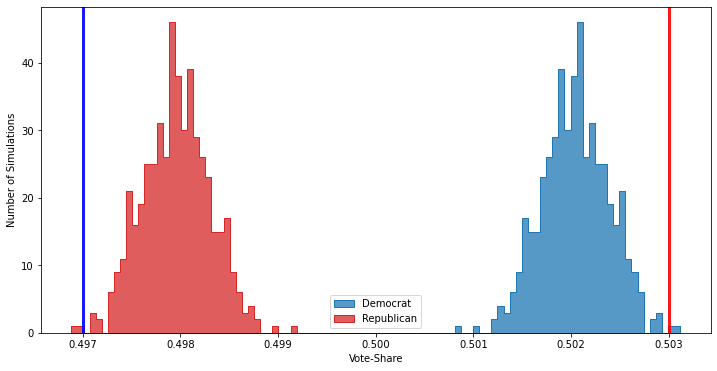

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    simulated_elections[["Democrat", "Republican"]], element="step", bins=100, ax=ax, alpha=0.75
)
ax.set_xlabel("Vote-Share")
ax.set_ylabel("Number of Simulations")
ax.axvline(single_poll_results["Republican"], color="red", lw=3, alpha=0.9)
ax.axvline(single_poll_results["Democrat"], color="blue", lw=3, alpha=0.9)

In [8]:
# This cell may take a few minutes
poll_results = run_polls(
    num_polls=500,
    num_to_poll=1000,
    electorate=electorate,
    assumed_demographics=demographics,
    sampling_strategy=predefined_sample(max_num_attempts=1, screen_likely_voters=False),
    aggregation_strategy=naive_aggregation()
)
poll_results.columns = [
    "Candidate Preference" if column == "candidate_preference" else column
    for column in poll_results.columns
]

Text(0, 0.5, 'Number of Simulations')

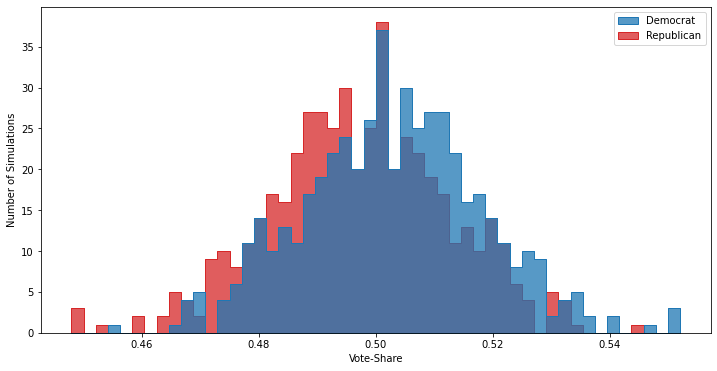

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    poll_results[["Democrat", "Republican"]], element="step", bins=50, ax=ax, alpha=0.75
)
ax.set_xlabel("Vote-Share")
ax.set_ylabel("Number of Simulations")